C:\Users\baotg2\AppData\Local\Temp\ipykernel_17188\1652419014.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True, kde=False, color = 'blue',


<Axes: >

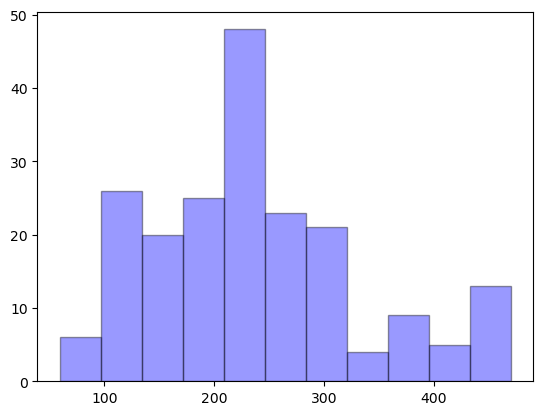

In [14]:
# bài thực hành lesson 7
# vẽ biểu đồ tần suất không có kernel density
import pandas as pd
import seaborn as sns
df = pd.read_csv("C:/Users/baotg2/OneDrive - TAP DOAN VINGROUP/Documents/VIN2024_XSTK/8. So Lieu/8. So Lieu/Lesson7_dataBTTH.csv")
x=df.values[:,0]
sns.distplot(x, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

C:\Users\baotg2\AppData\Local\Temp\ipykernel_17188\1391795248.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=True, kde=True, color = 'blue',


<Axes: ylabel='Density'>

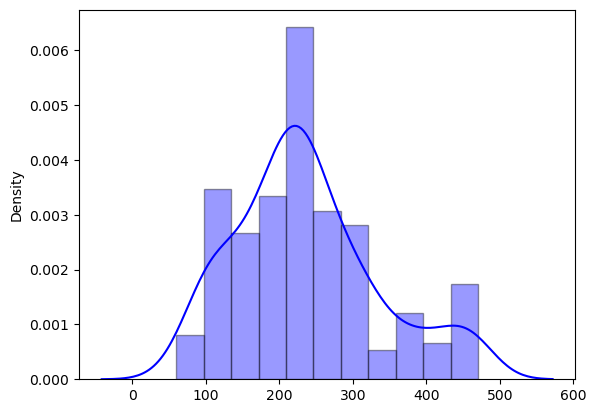

In [15]:
# vẽ biểu đồ tần suất có kernel density
sns.distplot(x, hist=True, kde=True, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [16]:

import numpy as np 
# tính trung bình và phương sai
print(np.mean(x))
print(np.var(x))
print(np.std(x))

236.77994999999999
9460.117877497501
97.26313730030253


In [17]:
# khoảng ước lượng của GTTB của pp chuẩn
from scipy.stats import t
n = len(x)
xbar =np.mean(x)
s = np.std(x)
t = t.ppf(1-(1-0.9)/2,n-1)
L = xbar - t*s/np.sqrt(n)
U = xbar + t*s/np.sqrt(n)
print(L, U)


225.41448969442968 248.1454103055703


In [18]:
# khoảng ước lượng của GTTB với kích thước mẫu lớn
from scipy.stats import norm
n = len(x)
xbar =np.mean(x)
s = np.std(x)
Z = norm.ppf(1-(1-0.9)/2)
L = xbar - Z*s/np.sqrt(n)
U = xbar + Z*s/np.sqrt(n)
print(L, U)

225.46739944797275 248.09250055202722


In [20]:
# khoảng ước lượng của GTTB bằng pp bootstrap
from sklearn.utils import resample

xnew=x[0:15]
xbarnew = np.mean(xnew)
print(xbarnew)
n_iterations = 1000
n_size = len(xnew)
# run bootstrap
stats = []
for i in range(n_iterations):
	Xb = resample(xnew,n_samples=n_size)
	stats.append(np.mean(Xb)-xbarnew)
# confidence interval
alpha = 1 - 0.9
Z1 = np.percentile(stats, 100*alpha/2)
print(Z1)
Z2 = np.percentile(stats, 100*(1-alpha/2))
print(Z2)
L = xbarnew - Z2
U = xbarnew - Z1
print(L, U)

265.37666666666667
-31.642833333333332
35.20849999999998
230.16816666666668 297.0195


In [21]:
# ước lượng của tỷ lệ
from scipy.stats import norm

k = 200
count = sum(i > k for i in x)
pmu = count/n
print(pmu)
Z = norm.ppf(1-(1-0.9)/2)
L = pmu - Z*np.sqrt(pmu*(1-pmu)/n)
U = pmu + Z*np.sqrt(pmu*(1-pmu)/n)
print(L, U)

0.645
0.5893447301506184 0.7006552698493816


In [22]:
# ước lượng của tỷ lệ bằng pp Bootstrap
from sklearn.utils import resample

k=200
n_size = len(xnew)
count = sum(i > k for i in xnew)
pmu = count/n_size
print(pmu)
n_iterations = 500
# run bootstrap
sigma = []
for i in range(n_iterations):
	Xb = resample(xnew,n_samples=n_size)
	sigma.append(sum(j > 200 for j in Xb)/n_size - pmu)
# confidence interval
alpha = 1 - 0.9
Z1 = np.percentile(sigma, 100*alpha/2)
print(Z1)
Z2 = np.percentile(sigma, 100*(1-alpha/2))
print(Z2)
L = pmu - Z2
U = pmu - Z1
print(L, U)

0.7333333333333333
-0.19999999999999996
0.20000000000000007
0.5333333333333332 0.9333333333333332


In [25]:
A = np.array([1,1,0,0,1,1]).reshape(2,3)
A1 = 1/3*np.array([2, -1, 1, 1, -1, 2]).reshape(3,2)

A@A1

print(A1@A)

[[ 0.66666667  0.33333333 -0.33333333]
 [ 0.33333333  0.66666667  0.33333333]
 [-0.33333333  0.33333333  0.66666667]]


In [27]:
print(np.linalg.inv(A@A.T))

[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


In [26]:
A@A.T

array([[2, 1],
       [1, 2]])

In [35]:
A = np.array([1, -6, 1, -2, 1, 1, 1, 7]).reshape(4,2)
B = np.array([-1, 2, 1, 6]).reshape(4,1)

C = np.linalg.lstsq(A,B)[0]
print(C)
Z = np.linalg.pinv(A)@B
print(Z)

[[2. ]
 [0.5]]
[[2. ]
 [0.5]]


C:\Users\baotg2\AppData\Local\Temp\ipykernel_17188\206078104.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.linalg.lstsq(A,B)[0]
